In [2]:
#K-Means
import pandas as pd
import sklearn, seaborn as sns
from sklearn.cluster import MiniBatchKMeans
import sys
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, normalized_mutual_info_score
import matplotlib.pyplot as plt
import optuna, os
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD

In [3]:
# !pip install optuna

In [4]:
os.listdir('C:/Users/gazur/Desktop/Polyfins_Intern-2023/dataset')

['fashion-mnist_test.csv',
 'fashion-mnist_train.csv',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

#### 1- Dataset import

In [5]:
df =pd.read_csv('C:/Users/gazur/Desktop/Polyfins_Intern-2023/dataset/fashion-mnist_train.csv')
test=pd.read_csv('C:/Users/gazur/Desktop/Polyfins_Intern-2023/dataset/fashion-mnist_test.csv')

#### 2- Basic EDA

In [6]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df.shape, test.shape

((60000, 785), (10000, 785))

In [80]:
df['label'].sort_values(ascending=True).value_counts()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64

In [81]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [82]:
labels = {0: "T-shirt/top",
         1: "Trouser",    
         2: "Pullover",    
         3: "Dress" ,
         4: "Coat",
         5:"Sandal",
         6:"Shirt",
         7:"Sneaker",
         8:"Bag",
         9:"Ankle boot"}
df['label']=df['label'].map(labels)

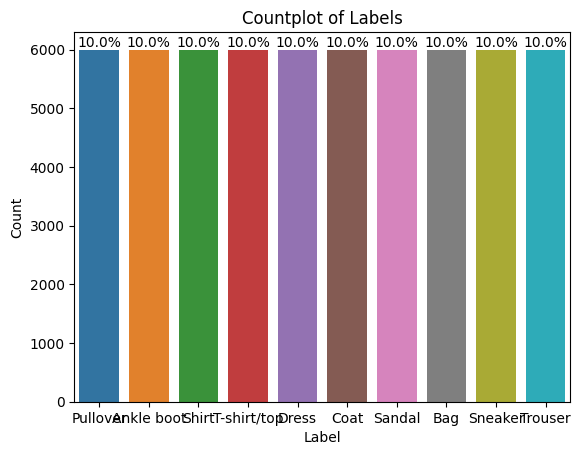

In [85]:
ax = sns.countplot(data=df, x='label')
total = len(df['label'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Countplot of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


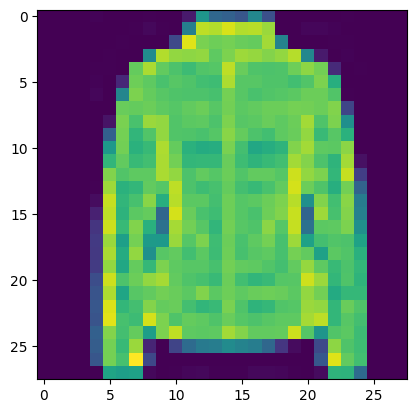

In [35]:
train=df.drop('label', axis=1)
train=train.values.reshape(60000, 28,28)
plt.imshow(train[25])

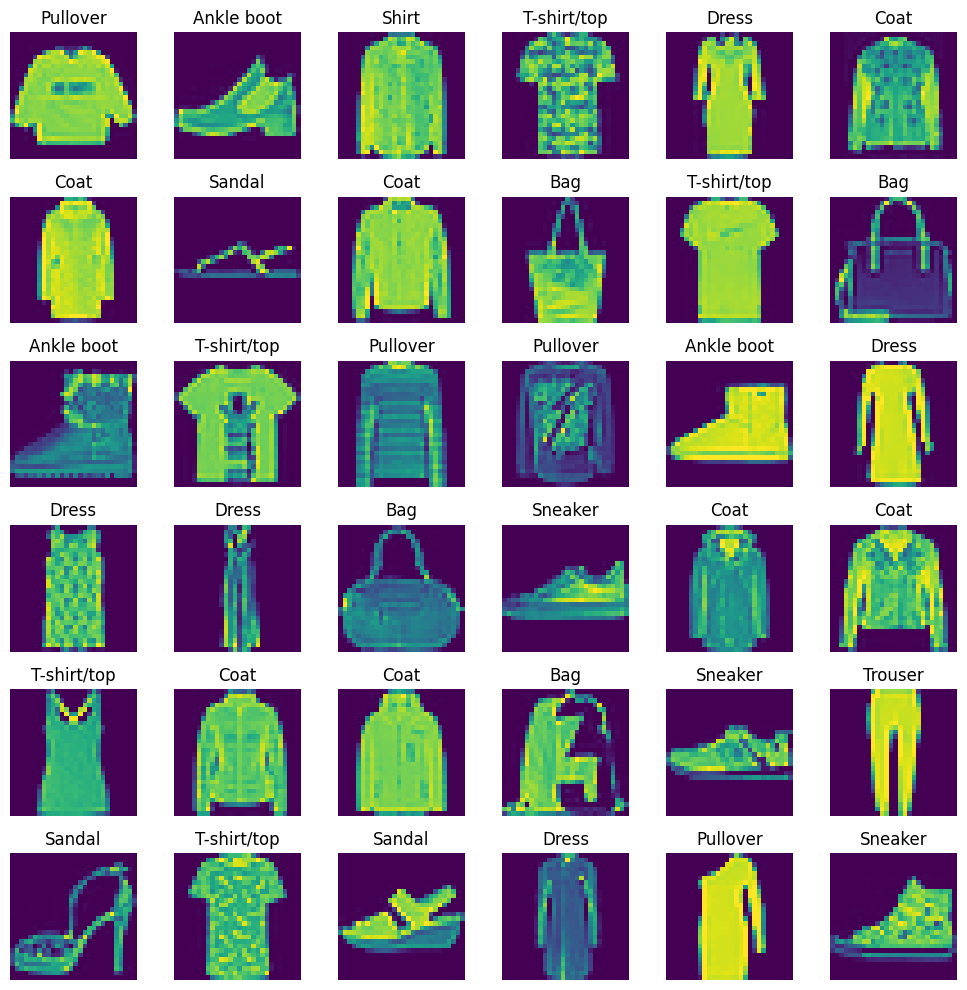

In [89]:
fig, axes = plt.subplots(6, 6, figsize=(10, 10))
axes = axes.ravel()
label=df['label']
for i in range(36):
    axes[i].imshow(train[i], cmap='viridis')
    axes[i].axis('off')
    axes[i].set_title(label[i])

plt.tight_layout()
plt.show()


In [90]:
df.isnull().sum().sort_values(ascending=True)

label       0
pixel517    0
pixel518    0
pixel519    0
pixel520    0
           ..
pixel264    0
pixel265    0
pixel266    0
pixel268    0
pixel784    0
Length: 785, dtype: int64

In [7]:
#take 20k sample for fast loading
X_train= df[:20000]

In [8]:
X=X_train.drop('label', axis=1)
y=X_train['label']

#### 1) t-SNE 

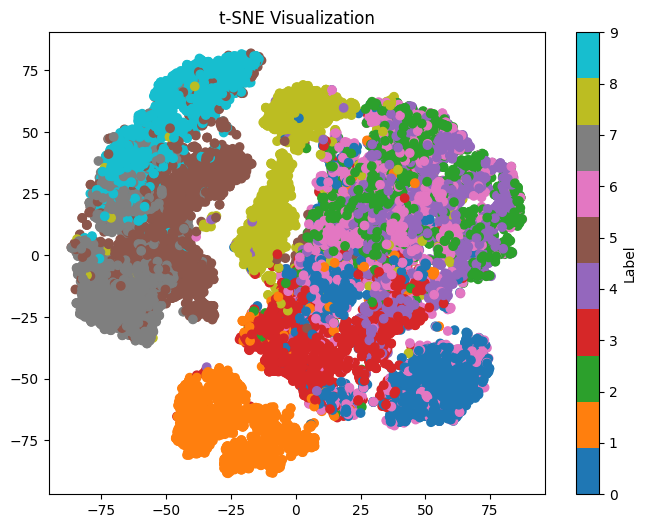

In [32]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
plt.colorbar(label='Label')
plt.title('t-SNE Visualization')
plt.show()

#### 2) Parameter tuning

In [15]:
def objective(trial):
    n_clusters = trial.suggest_int('n_clusters', 10)
    n_init = trial.suggest_int('n_init', 1, 100)
    max_iter = trial.suggest_int('max_iter', 100, 1000, step=20)
    init = trial.suggest_categorical('init', ['k-means++', 'random'])
    
    # Create an instance of KMeans
    kmeans = KMeans(n_clusters=n_clusters,init=init, n_init=n_init, max_iter=max_iter, random_state=42)
    ms = MinMaxScaler()
    X1 = ms.fit_transform(X)
    kmeans.fit(X1)
    
    # Calculate the silhouette score as the optimization metric
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    
    # Return the negative silhouette score since Optuna aims to maximize the objective
    return -silhouette_avg

# Perform parameter tuning using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best parameters and the corresponding score
best_params = study.best_params
best_score = -study.best_value
print("Best Parameters:", best_params)
print("Best Score:", best_score)

[I 2023-07-19 23:08:14,852] A new study created in memory with name: no-name-574c0909-4dc8-4ca9-9a28-0a370259183f
[I 2023-07-19 23:09:42,365] Trial 0 finished with value: -0.18750248136513048 and parameters: {'n_clusters': 3, 'n_init': 73, 'max_iter': 1200, 'init': 'k-means++'}. Best is trial 0 with value: -0.18750248136513048.
[I 2023-07-19 23:10:01,568] Trial 1 finished with value: -0.16247836713927985 and parameters: {'n_clusters': 5, 'n_init': 5, 'max_iter': 1200, 'init': 'random'}. Best is trial 1 with value: -0.16247836713927985.
[I 2023-07-19 23:10:26,345] Trial 2 finished with value: -0.1655460681206942 and parameters: {'n_clusters': 7, 'n_init': 15, 'max_iter': 1000, 'init': 'random'}. Best is trial 1 with value: -0.16247836713927985.
[I 2023-07-19 23:10:52,183] Trial 3 finished with value: -0.19458028021772505 and parameters: {'n_clusters': 2, 'n_init': 38, 'max_iter': 1300, 'init': 'k-means++'}. Best is trial 1 with value: -0.16247836713927985.
[I 2023-07-19 23:12:41,735] Tr

Best Parameters: {'n_clusters': 11, 'n_init': 57, 'max_iter': 1800, 'init': 'k-means++'}
Best Score: 0.15119761015745325


In [33]:
kmeans=KMeans(init='k-means++',n_clusters=10, n_init=57, max_iter=1800,random_state =42)
ms = MinMaxScaler()
X1 = ms.fit_transform(X)

####  K-Means  with t-SNE

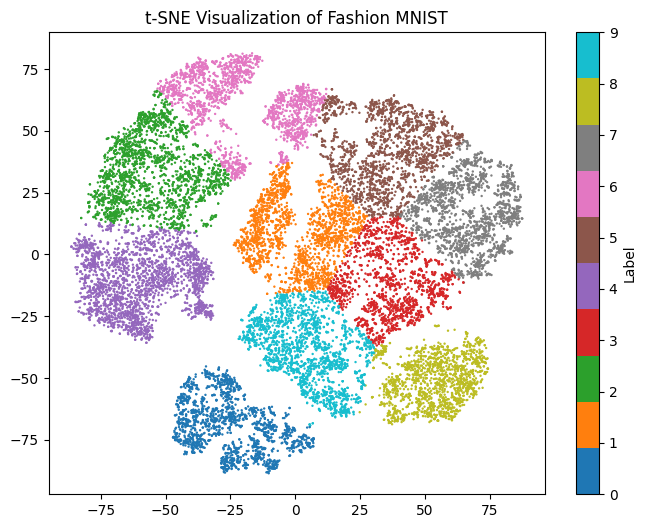

CPU times: total: 8min 18s
Wall time: 2min 18s


In [30]:
%%time
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X1)
kmeans.fit(X_tsne)
# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='tab10', s = 0.5)
plt.colorbar(label='Label')
plt.title('t-SNE Visualization of Fashion MNIST')
plt.show()

In [31]:
print("silhouette score with t-SNE : ",silhouette_score(X_tsne, kmeans.labels_))

silhouette score with t-SNE :  0.413302


#### 3) PCA with K-Means

344


C:\Users\gazur\Anaconda3\envs\polyfins_intern_work\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


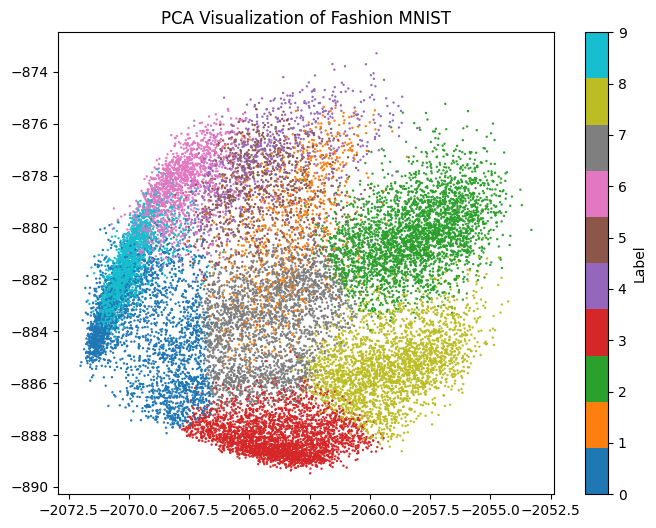

CPU times: total: 1min 34s
Wall time: 32.9 s


In [25]:
%%time
pca= PCA(.98)
pca.fit(X)
print(pca.n_components_)
X_pca = pca.transform(X1)
kmeans.fit(X_pca)
# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='tab10', s = 0.5)
plt.colorbar(label='Label')
plt.title('PCA Visualization of Fashion MNIST')
plt.show()

In [28]:
print("silhouette score with PCA :", silhouette_score(X_pca, kmeans.labels_))

silhouette score for PCA : 0.1611095898965379


#### 4) SVD with K-Means

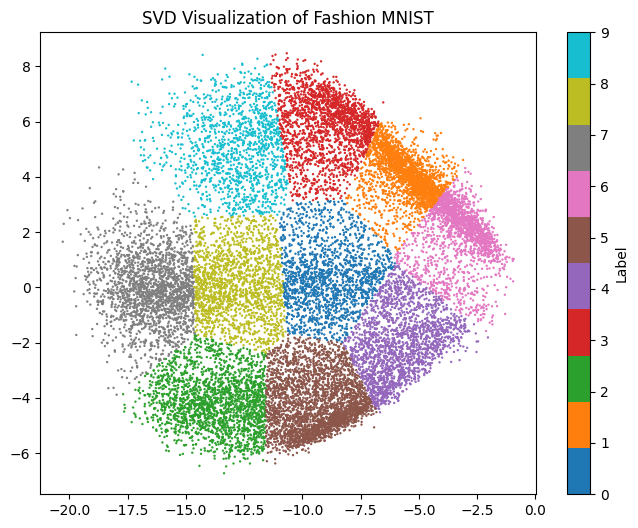

CPU times: total: 9.64 s
Wall time: 5.1 s


In [11]:
%%time
U, s, V = np.linalg.svd(X1, full_matrices=False)
n_components = 2
X_svd = U[:, :n_components] * s[:n_components]
kmeans.fit(X_svd)
# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans.labels_, cmap='tab10', s = 0.5)
plt.colorbar(label='Label')
plt.title('SVD Visualization of Fashion MNIST')
plt.show()


In [15]:
print("silhouette score with SVD :", silhouette_score(X_svd, kmeans.labels_))

0.40423945303225334

#### 5) TruncatedSVD with K-Means

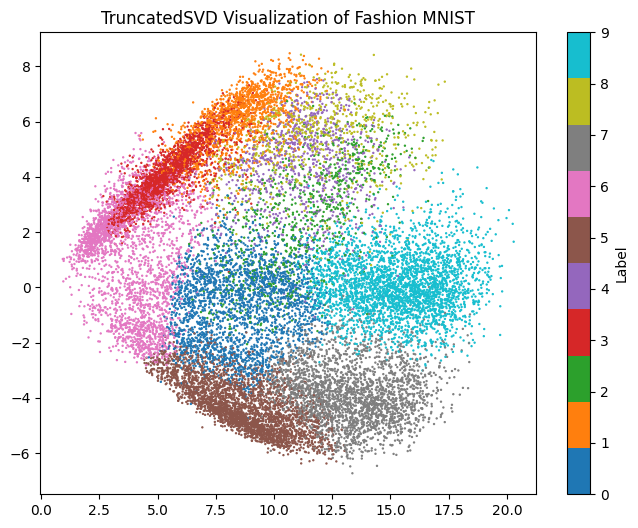

In [16]:
svd = TruncatedSVD(n_components=120, n_iter=7, random_state=42)
Xt_svd=svd.fit_transform(X1)
kmeans.fit(Xt_svd)
# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(Xt_svd[:, 0], Xt_svd[:, 1], c=kmeans.labels_, cmap='tab10', s = 0.5)
plt.colorbar(label='Label')
plt.title('TruncatedSVD Visualization of Fashion MNIST')
plt.show()

In [17]:
print("silhouette score with TruncatedSVD :", silhouette_score(Xt_svd, kmeans.labels_))

0.17805977030758943

#### 6) ICA with K-Means

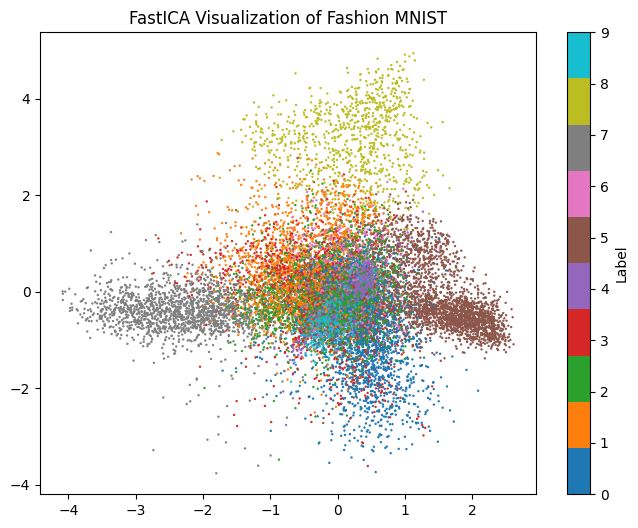

In [18]:
transformer = FastICA(n_components=7,random_state=0,whiten='unit-variance')
X_transformed = transformer.fit_transform(X1)
kmeans.fit(X_transformed)
# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=kmeans.labels_, cmap='tab10', s = 0.5)
plt.colorbar(label='Label')
plt.title('FastICA Visualization of Fashion MNIST')
plt.show()

In [19]:
print("silhouette score with FastICA :", silhouette_score(X_transformed, kmeans.labels_))

0.31123366879667885

#### 7) Determine the Best applicable method & apply that on our data
After applied several dimentionality reduction I found two of them are very interesting and better in terms of score and visualization. Now, Lets see which is performed better in our whole dataset.

In [40]:
#drop label from dataframe
dataset=df.drop('label', axis=1)
ms = MinMaxScaler()
X1 = ms.fit_transform(dataset)

- First one is `t-SNE` which have silhouette score is `0.413302` on only 20k dataset.

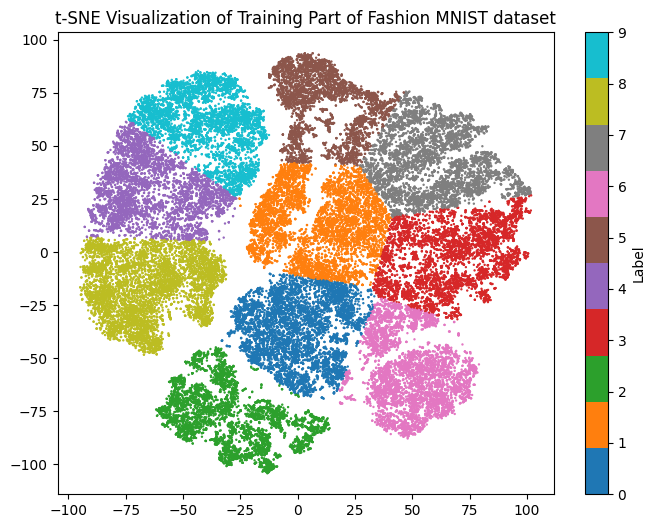

CPU times: total: 28min 32s
Wall time: 8min 56s


In [41]:
%%time
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X1)
kmeans.fit(X_tsne)
# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='tab10', s = 0.5)
plt.colorbar(label='Label')
plt.title('t-SNE Visualization of Training Part of Fashion MNIST Dataset')
plt.show()

In [42]:
print("silhouette score with t-SNE : ",silhouette_score(X_tsne, kmeans.labels_))

silhouette score with t-SNE :  0.3860992


- Another one is `SVD` which have silhouette score is `0.0.404239453` on only 20k dataset.

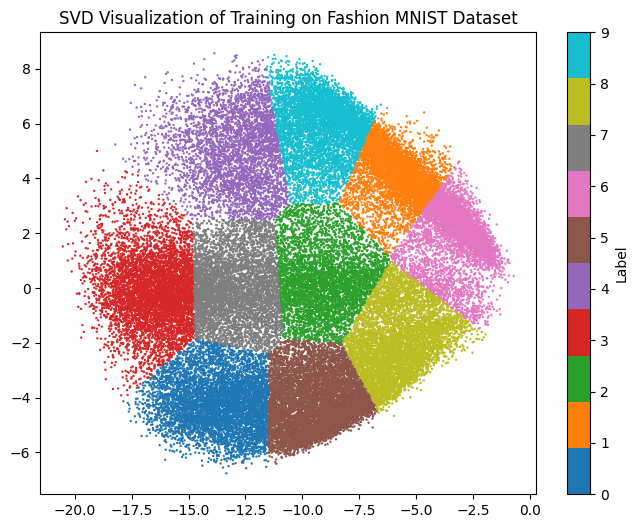

CPU times: total: 36.2 s
Wall time: 13.8 s


In [45]:
%%time
U, s, V = np.linalg.svd(X1, full_matrices=False)
n_components = 2
X_svd = U[:, :n_components] * s[:n_components]
kmeans.fit(X_svd)
# Visualize the t-SNE representation
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans.labels_, cmap='tab10', s = 0.5)
plt.colorbar(label='Label')
plt.title('SVD Visualization of Training on Fashion MNIST Dataset')
plt.show()

In [46]:
print("silhouette score with SVD : ",silhouette_score(X_svd, kmeans.labels_))

silhouette score with t-SNE :  0.40298608387454377


#### 9) Review of the workflow
This notebook based on Fashion Mnist dataset, Which have 60k train data & 10k test data with 10 classification label. Each row have 785 column which define 28x28 image size and label. After doing EDA can confirm that there is no class imballance.

In this note, Used several dimensinality method like PCA,t-SNE, FastICA, SVD, TruncateSVD with a polular clustering method named KMeans. After EDA did parameter tuning using optuna to choose the best fitted parameter for the model.Depending on finding parameter implement Kmeans on the variation of data. Firstly, just take a sample of dataset like 20k data to find the suitable reduction technique for this dataset. Finally, Got our best fitted reduction technique but not one its two. For exploring the whole dataset pick two & check which one get best fitted on that. Little bit surprised after the result. In the sample of data t-SNE technique got `0.413302` score but in whole data the score decrease to `0.3860992` but got less dcreased on the other technique which is SVD, portion of data's score was `0.0.404239453` & dataset got ` 0.402986083` which is .002 .

Many of Us mixed between feature selection & dimentionality reduction, So let's clarified that. Suppose you have a dataste & have 5 features **size, Number of rooms, Number of bathrooms, school around, crime rate**. For feature selection we can choose any of this **three** feature without changing. But When we talk about reduction its not about just chosing arbitary it about transform feature from hight to low. Again question can comes our mind, How? We have feature & obviously those have common in beteen them & we can used this trick here, for example **size, Number of rooms, Number of bathrooms** those three feature talk about size, reduction technique pick those three as **Size feature** & **school around, crime rate** these two calculate as **location**. Thats the way dimentionality reduction works from `5` columns convert it into `2`.

Now, Question is why Fashion Mnist dataset did very well on t-SNE & SVD dimentionality technique not others. Every dimentinality technique have their own paramter like PCA works good on high `variance`, `Linear Transformation` works on several reduction technique like PCA, LDA, TruncatedSVD.

- PCA skips less significant components but SVD not .
- PCA & truncate SVD are not differe so much because they are based on smae theory. we can see the score on our data.(**eigenvector, eigenvalue**), works better with better co-relation & co-variance dataset.
- t-SNE try to find the underlines structure of the datataking into the neighbors of a sample.


In [55]:
np.var(df, axis=0).head(4) # see how low variance here

label     8.250000
pixel1    0.008966
pixel2    0.073446
pixel3    1.494052
dtype: float64

In [56]:
df.corr()  #can check the co-rellation of between each column

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,1.000000,-0.000674,0.002944,-0.010439,-0.007111,-0.004632,-0.011045,-0.036765,-0.085211,-0.161552,...,-0.362614,-0.258380,-0.183131,-0.090568,-0.077340,-0.066936,-0.018038,0.045598,0.059960,0.021772
pixel1,-0.000674,1.000000,0.297899,0.067550,0.046608,0.026630,0.026172,0.012095,0.012218,0.009637,...,-0.000642,0.004625,0.004605,0.000969,-0.002306,-0.002441,-0.000108,0.008765,0.026389,0.041582
pixel2,0.002944,0.297899,1.000000,0.575029,0.138710,0.054354,0.033185,0.022763,0.017127,0.016809,...,0.000492,0.004857,0.006811,0.002083,-0.004431,-0.002342,0.004273,0.014218,0.021297,0.022162
pixel3,-0.010439,0.067550,0.575029,1.000000,0.387466,0.118135,0.087300,0.060927,0.035920,0.029712,...,0.010131,0.016743,0.018358,0.006171,-0.003825,-0.001501,0.006860,0.013152,0.009946,0.015657
pixel4,-0.007111,0.046608,0.138710,0.387466,1.000000,0.573172,0.325684,0.242954,0.140955,0.085253,...,0.009684,0.018697,0.023373,0.016718,0.009681,0.010095,0.023942,0.012392,0.003075,0.008423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.066936,-0.002441,-0.002342,-0.001501,0.010095,0.021505,0.032305,0.027024,0.019414,0.024837,...,-0.074375,-0.009124,0.042812,0.336699,0.790103,1.000000,0.749528,0.349021,0.178599,0.073398
pixel781,-0.018038,-0.000108,0.004273,0.006860,0.023942,0.025974,0.038563,0.030464,0.026227,0.034158,...,-0.042349,0.008555,0.045394,0.130783,0.439260,0.749528,1.000000,0.645809,0.334519,0.133817
pixel782,0.045598,0.008765,0.014218,0.013152,0.012392,0.028863,0.044121,0.029457,0.022724,0.020953,...,-0.002807,0.034069,0.073942,0.092657,0.152471,0.349021,0.645809,1.000000,0.658962,0.225502
pixel783,0.059960,0.026389,0.021297,0.009946,0.003075,0.022941,0.030806,0.016126,0.005938,0.000074,...,0.001898,0.026530,0.054193,0.077633,0.101066,0.178599,0.334519,0.658962,1.000000,0.451929
